<a href="https://colab.research.google.com/github/ju-vargas/Arquitetura-de-Computadores-I/blob/main/labCPD_03(extra)_CPP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disciplina de Classificação e Pesquisa de Dados
 
# Laboratório #3
 
### Implementação (em C++) dos principais algoritmos de classificação por seleção.

A seguir você encontra uma **versão local do algoritmo heapsort**. Ele utiliza o buildheap que constrói um max-heap a partir do array passado (lembre-se que um max-heap é aquele que tem o maior elemento na raíz, i.e., os pais são maiores ou iguais aos filhos). Você **também encontra funções auxiliares para identificar o filho esquerdo, o filho direito e o pai de um elemento** no array (heap).

O exercício consiste em:

1. **implementar a função heapify**, que é usada pelos algoritmos buildheap e heapsort. Lembre-se que ela deve garantir que toda a subárvore é um heap (do elemento passado até a folha), e é normalmente implementada de maneira recursiva. 
2. **implementar a função 'heap_max', 'extract_max' e 'insert_heap'**. A primeira devolve o primeiro elemento do heap (sem retirá-lo), operando em *O*(1). A segunda devolve e extrai o primeiro elemento do heap, colocando um elemento substituto no lugar em *O*(log *n*), garantindo que o array continua sendo um heap. A última insere um elemento no heap em *O*(log *n*), mantendo as propriedades de heap do array.

Para que possamos avaliar o desempenho dos algoritmos implementados e identificarmos as melhores maneiras de resolver os problemas, vamos desenvolver alternativas. Para tanto:

4. **Elabore uma versão de build-heap** que constroi o heap de cima para baixo ao invés de baixo para cima. Para tanto, ela deve fazer heapify do primeiro ao último elemento pai (e não do último pai para a raíz). Analise qual versão apresenta melhor desempenho (a original ou a alternativa) em termos de comparações e trocas. Se desejar, elabore (e compare) também alguma versão diferente, com base em alguma ideia sua. 

5. **Analise o desempenho** (tempo, comparações e trocas) **do heap-sort tradicional**, em arrays crescentes e decrescentes, de 100, 1000 e 10000 elementos**. 

6. **Use a função build-heap tradicional e a alternativa (exercício 4)** para transformar um pequeno array aleatório (criado por você, com não mais do que 16 elementos) em heaps. 

**Desafios (exercícios extras)**: 
1. elabore a função **iteractive-build-heap**, que constrói um heap inserindo elemento por elemento em um array auxiliar (ou seja, não é local). Analise qual versão apresenta melhor desempenho (a iterativa não local ou a tradicional, local), avaliando o número de trocas e de comparações.
2. **implementar um 'min-heap'**, que é um heap invertido, ou seja, que tem o menor elemento na raiz (e os pais são menores ou iguais aos filhos).

In [ ]:
%%writefile sorting3.cpp
#include<iostream>
#include<tuple>
#include<string>
#include<vector>
#include<unordered_map>
#include<bits/stdc++.h>
#include<map>

using namespace std;

// Definições e variáveis globais necessárias
typedef int element_t;                                                          // tipo do elemento
typedef vector<element_t> array_t;                                              // tipo do array
typedef tuple<int, int, double> loginfo_t;                                      // armazena informações de desempenho <trocas, comparações, tempo em ms>

void selectionsort(array_t&, loginfo_t&);
void heapsort(array_t&, loginfo_t&);
void buildheap(array_t&, loginfo_t&);
int filho_e(const array_t&, element_t);
int filho_d(const array_t&, element_t);
int pai(const array_t&, element_t);
void heapify(array_t&, element_t, int, loginfo_t&);
int heap_max(const array_t&, loginfo_t&);
int extract_max(array_t&, loginfo_t&);
void heap_insert(array_t&, element_t, loginfo_t&);
void swap(element_t* n1, element_t* n2);

int main(void){
  loginfo_t loginfo;
  int qtd;
  array_t array1 = {1,2,3,4,5,6,7,8};

  buildheap(array1, loginfo);
  
  for(auto e:array1)
     cout << e << " ";  
  cout << endl;

  array_t array2 = {9,8,7,6,5,4,3,1};
  heapsort(array2, loginfo);

  for(auto e:array2)
     cout << e << " ";  
  cout << endl;

  return 0;
}

// ################################################
// Algoritmos de ordenação por Seleção
// ################################################
 
// Seleção direta 
void selectionsort(array_t& array, loginfo_t& loginfo){
   int trocas = 0;
   int comparacoes = 0;
   element_t menorchave;
   int qtd_elementos = array.size()-1;  

   for(auto i=0; i<qtd_elementos;i++){
      menorchave = i;
      for(auto j=i; j<qtd_elementos+1; j++){                   
         comparacoes = comparacoes + 1;
         if(array[j] < array[menorchave]){ 
            menorchave = j;
         }
      }   
      if(menorchave != i){
         swap(array[i], array[menorchave]);
         trocas = trocas + 1;
      }
   }
   get<0>(loginfo)=trocas;
   get<1>(loginfo)=comparacoes;
} 

// Heapsort e funções auxiliares
void heapsort(array_t& array, loginfo_t& loginfo){
   int trocas = 0;
   int comparacoes = 0;
   int heap_size = array.size();
   int qtd_elementos = heap_size-1;   
    
   buildheap(array, loginfo);
    
   for(auto i = qtd_elementos; i>0; i--){
      trocas++;
      swap(array[i], array[0]);
      heap_size--;
      heapify(array, 0, heap_size, loginfo); 
   }
   get<0>(loginfo)=trocas;
   get<1>(loginfo)=comparacoes;
}

// usada no heapsort
void buildheap(array_t& array, loginfo_t& loginfo){
   int ultimo_pai = (array.size()/2)-1;
   for(auto i=ultimo_pai; i>0; i--)
      heapify(array, i, array.size(), loginfo);
}
  
int filho_e(const array_t& array, element_t elemento){
   return elemento*2+1;
}
 
int filho_d(const array_t& array, element_t elemento){
   return elemento*2+2;
}
 
int pai(const array_t& array, element_t elemento){
   return (elemento/2);
}
 
// ################################################
// Implementação dos seus algoritmos:
   
// heapify: verifica se o elemento na posição passada é um heap e se não for transforma-o em um
// parâmetros: array, índice do elemento a heapificar, tamanho do heap, dicionário de logs
void heapify(array_t& array, element_t elemento, int heap_size, loginfo_t& loginfo){
    // a implementar
}
 
int heap_max(array_t& heap, loginfo_t& loginfo){
    // A implementar!    
    return -1;
}

int extract_max(array_t& heap, loginfo_t& loginfo){    
   // A implementar!
   return -1;
}
 
void heap_insert(array_t& heap, element_t elemento, loginfo_t& loginfo){
   // A implementar!
}

Writing sorting3.cpp


In [ ]:
%%script bash
g++ sorting3.cpp -o sorting3

In [ ]:
%%script bash
./sorting3

1 2 3 4 5 6 7 8 
8 7 6 5 4 3 1 9 


##How To

### O que é HEAPSORT?

Espécie de algoritmo de seleção. Seleciono o maior/menor elemento e coloco em seu lugar. 

Heap = array visto como árvore binária. De preferência, não crio estrutura nova para a árvore. 


#
1 BUILD HEAP
Transforma o array em MaxHeap (heap em que os pais são sempre maiores ou iguais)


#
2 DESTRÓI HEAP
Destruir o array, ordenando-o. 

    - troca última folha (ultimo index do array da árvore) com o topo, e tira o topo da árvore, inserindo no último index do array ordenado
    - ordena de novo pra virar MAX HEAP
    - repete até a árvore ficar vazia 



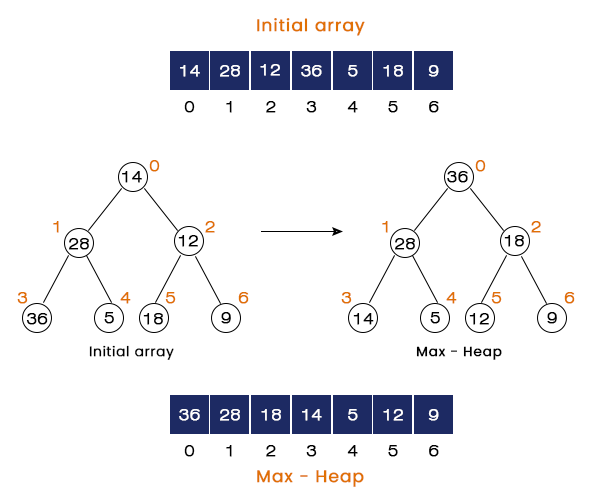